In [1]:
import pandas as pd
import numpy as np

### Загрузка и подготовка данных

In [2]:
df = pd.read_csv('pet_price_predict.csv', index_col = 0)

In [3]:
df.head(100)

,pet,brent_close_1D_mean,brent_open_1D_mean,brent_max_1D_mean,brent_min_1D_mean,USDCNY_close_1D_mean,USDCNY_open_1D_mean,USDCNY_max_1D_mean,USDCNY_min_1D_mean,brent_close_7D_mean,...,USDCNY_min_180D_max,brent_close_180D_min,brent_open_180D_min,brent_max_180D_min,brent_min_180D_min,USDCNY_close_180D_min,USDCNY_open_180D_min,USDCNY_max_180D_min,USDCNY_min_180D_min,month
date,,,,,,,,,,,,,,,,,,,,,
2004-06-01,961.250,32.23,32.95,33.14,32.15,8.2767,8.2767,8.2767,8.2767,36.5450,...,8.2774,27.86,28.05,28.43,27.68,8.2767,8.2767,8.2767,8.2767,6
2004-07-01,962.000,35.29,34.75,35.44,34.43,8.2767,8.2767,8.2767,8.2767,35.6740,...,8.2774,28.83,28.94,29.18,28.44,8.2767,8.2767,8.2767,8.2767,7
2004-08-01,1053.750,37.05,37.60,37.80,37.00,8.2769,8.2769,8.2769,8.2769,36.9820,...,8.2774,28.83,29.00,29.18,28.44,8.2766,8.2766,8.2766,8.2766,8
2004-09-01,1180.000,37.05,37.60,37.80,37.00,8.2769,8.2769,8.2769,8.2769,40.5225,...,8.2774,30.07,29.65,30.15,29.57,8.2766,8.2766,8.2766,8.2766,9
2004-10-01,1240.000,42.22,40.25,42.30,40.10,8.2768,8.2768,8.2768,8.2768,41.0440,...,8.2774,30.21,30.69,30.92,29.95,8.2766,8.2766,8.2766,8.2766,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-05-01,1448.125,122.67,122.85,122.86,121.02,6.3089,6.3063,6.3116,6.3026,123.3250,...,6.3775,103.35,103.51,104.56,102.37,6.2938,6.2935,6.2941,6.2862,5
2012-06-01,1249.000,113.20,113.05,113.27,111.31,6.3101,6.3081,6.3116,6.3077,113.6700,...,6.3743,103.35,103.51,104.56,102.37,6.2938,6.2935,6.2941,6.2862,6
2012-07-01,1288.125,113.20,113.05,113.27,111.31,6.3101,6.3081,6.3116,6.3077,99.5460,...,6.3720,98.43,98.43,99.15,95.63,6.2938,6.2935,6.2941,6.2862,7


In [4]:
count = [i for i in df if '1D' in i]

In [5]:
count

['brent_close_1D_mean',
 'brent_open_1D_mean',
 'brent_max_1D_mean',
 'brent_min_1D_mean',
 'USDCNY_close_1D_mean',
 'USDCNY_open_1D_mean',
 'USDCNY_max_1D_mean',
 'USDCNY_min_1D_mean']

In [6]:
df.drop(count, axis = 1, inplace = True)

In [7]:
#df.dropna(inplace = True)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [10]:
np.corrcoef(df.iloc[:,0].values,df['brent_close_180D_mean'].values)[0, 1] # ДЗ - проверка гипотез

nan

### Проверка гипотез
Сейчас я хочу посмотреть, как коррелируют значения за разные промежутки (7,30,60,180 дней). 

In [11]:
import matplotlib.pyplot as plt
days_list = ['7D', '30D', '60D','180D']
df_list = [[] for i in range(len(days_list))] # Список из списков, в который будем класть результат цикла
for i in range(len(days_list)):
    df_spec_day = [n for n in df if days_list[i] in n] #Обозначаем, за какой период будем рассматривать датафрейм
    df2 = df[df_spec_day] 
    df3 = df['pet'].to_frame()
    dff = df3.join(df2)
    corr_df = dff.corr() # Рассчитываем корреляцию
    new_df = corr_df.iloc[:,0].to_frame() # Приводим Series в формат DF
    new_df.drop('pet', axis = 0, inplace = True) #убираем первую строку корреляции pet с pet
    df_list[i] = new_df.sort_values(by = 'pet', ascending = False) # фиксируем корреляцию pet с показателями за период в i элементе df_list

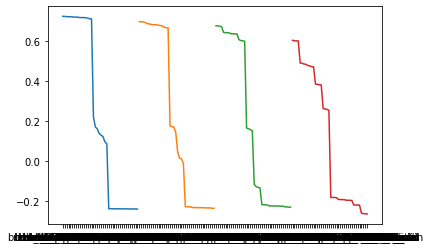

In [12]:
import matplotlib.pyplot as plt
for i in range(len(df_list)):
    plt.plot(df_list[i])

#### Исходя из графика (и из первого взгляда на задачу) я вижу, что есть несущественная, но тем не менее большая корреляция у данных за меньший промежуток времени (7D).

In [53]:
df_list[0].head(15)

,pet
brent_close_7D_min,0.725037
brent_min_7D_min,0.724750
brent_close_7D_median,0.723378
brent_close_7D_mean,0.723279
brent_max_7D_min,0.723251
brent_min_7D_mean,0.722394
brent_open_7D_min,0.721251
brent_open_7D_median,0.721243
brent_min_7D_median,0.720319
brent_max_7D_mean,0.719071


In [48]:
df_list[2].tail(25)

,pet
brent_open_60D_max,0.600246
USDCNY_close_60D_std,0.166855
USDCNY_open_60D_std,0.163129
USDCNY_max_60D_std,0.158728
USDCNY_min_60D_std,0.153133
brent_min_60D_std,-0.114369
brent_close_60D_std,-0.126114
brent_open_60D_std,-0.129578
brent_max_60D_std,-0.132380
USDCNY_open_60D_max,-0.216230


#### Исходя из данных любого листа, сразу видно, что курс USDCNY слабо влияет на таргет (pet), а некоторые столбцы с brent имеют высокую корреляцию (~0.7)

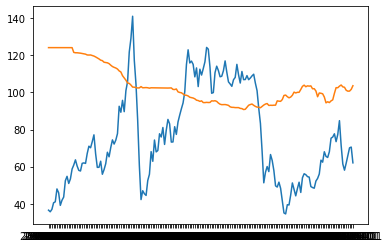

In [55]:
plt.plot(df['brent_close_7D_mean'])
plt.plot(df['USDCNY_close_7D_mean']*15)  #умножил на 15, чтобы, во-первых, показатель курса ложился в диапазоне значений цен на нефить, а во-вторых, чтобы изменения более явно отражались на графике

#### По графику я не вижу явной зависимости между двумя графиками.

In [16]:
df2 = df['brent_close_7D_mean'].to_frame()
df3 = df['USDCNY_close_7D_mean'].to_frame()
dff = df3.join(df2)

In [17]:
dff.corr()

,USDCNY_close_7D_mean,brent_close_7D_mean
USDCNY_close_7D_mean,1.00000,-0.47664
brent_close_7D_mean,-0.47664,1.00000


#### Я решил посмотреть корреляцию средней цены закрытия пары USDCNY и цены на нефть на недельном графике. Получил к-ф корреляции равный ~0.63, что является средним уровнем корреляции.

#### Проверка модели.
(Тренировочный датасэт - 2002:2013; тестовый - 2014:2015)

In [18]:
x = df.iloc[:,1:]

In [19]:
y = df.iloc[:,0].to_frame()

In [20]:
x_tr = x['2002':'2013']
y_tr = y['2002':'2013']
x_ts = x['2014':'2015']
y_ts = y['2014':'2015']

In [21]:
from sklearn.model_selection import ParameterGrid

alpha_params = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
epsilon_params = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6] #числа которые будут использоваться

params = ParameterGrid({'alpha':alpha_params, 'epsilon':epsilon_params}) # создание словаря
errors = [] #список с ошибками (МАРЕ для каждой комбинации параметров)

In [22]:
from sklearn.linear_model import HuberRegressor
for param in params:
    huber = HuberRegressor(alpha = param['alpha'], epsilon= param['epsilon'])
    huber.fit(x_tr, y_tr)
    
    pred = huber.predict(x_ts)
    
    cv_mape = mape(y_ts, pred)
    errors.append({'mape':cv_mape, 'alpha':param['alpha'], 'epsilon':param['epsilon']})

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbf

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbf

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbf

In [23]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [24]:
errors = pd.DataFrame.from_records(errors)
errors.iloc[errors['mape'].idxmin()]

mape       14.78142
alpha       0.25000
epsilon     1.60000
Name: 35, dtype: float64

In [25]:
huber = HuberRegressor(alpha = .25, epsilon=1.6)
huber.fit(x_tr, y_tr)
pred = huber.predict(x_ts)
cv_mape = mape(y_ts, pred)

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [26]:
cv_mape

14.781420224573106

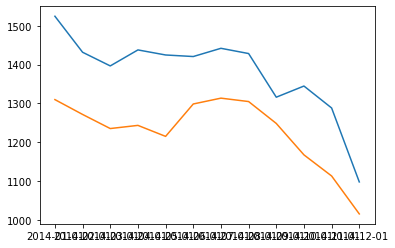

In [27]:
plt.plot(pred)
plt.plot(y_ts)

#### Генерация новых фичей + удаление старых фичей

In [28]:
df.head() # сейчас в df 162 столбца, первый из них - целевой, который будем предсказывать.

,pet,brent_close_7D_mean,brent_open_7D_mean,brent_max_7D_mean,brent_min_7D_mean,USDCNY_close_7D_mean,USDCNY_open_7D_mean,USDCNY_max_7D_mean,USDCNY_min_7D_mean,brent_close_7D_median,...,USDCNY_min_180D_max,brent_close_180D_min,brent_open_180D_min,brent_max_180D_min,brent_min_180D_min,USDCNY_close_180D_min,USDCNY_open_180D_min,USDCNY_max_180D_min,USDCNY_min_180D_min,month
date,,,,,,,,,,,,,,,,,,,,,
2004-06-01,961.25,36.5450,36.1275,36.820,35.8875,8.27710,8.27710,8.27710,8.27710,36.625,...,8.2774,27.86,28.05,28.43,27.68,8.2767,8.2767,8.2767,8.2767,6
2004-07-01,962.00,35.6740,35.9140,36.418,35.0760,8.27672,8.27672,8.27672,8.27672,35.670,...,8.2774,28.83,28.94,29.18,28.44,8.2767,8.2767,8.2767,8.2767,7
2004-08-01,1053.75,36.9820,36.8380,37.350,36.4460,8.27684,8.27684,8.27684,8.27684,37.050,...,8.2774,28.83,29.00,29.18,28.44,8.2766,8.2766,8.2766,8.2766,8
2004-09-01,1180.00,40.5225,40.4950,41.135,39.9825,8.27695,8.27695,8.27695,8.27695,40.635,...,8.2774,30.07,29.65,30.15,29.57,8.2766,8.2766,8.2766,8.2766,9
2004-10-01,1240.00,41.0440,40.9020,41.500,40.4100,8.27670,8.27670,8.27670,8.27670,40.760,...,8.2774,30.21,30.69,30.92,29.95,8.2766,8.2766,8.2766,8.2766,10


In [29]:
new_df = df.copy()

In [30]:
d_180_list = [i for i in new_df if '180D' in i]
d_60_list = [i for i in new_df if '60D' in i]
d_7_list = [i for i in new_df if '7D' in i]

In [31]:
#d_180_list
#d_60_list
#d_7_list
#len(d_180_list)
#len(d_60_list)
#len(d_7_list) # проверка на то, что у во всех случаях длина и порядок одинаковые

In [32]:
for i in range(len(d_180_list)):
    col1 = d_180_list[i]
    col2 = d_60_list[i]
    col3 = d_7_list[i]
    new_column1 = col1 + '/' + col2 #'D_180/D_60'
    new_column2 = col2 + '/' + col3 #'D_180/D_60'
    new_df[new_column1] = df[col1] / df[col2]
    new_df[new_column2] = df[col2] / df[col3]

In [33]:
new_df # стало 242 столбца

,pet,brent_close_7D_mean,brent_open_7D_mean,brent_max_7D_mean,brent_min_7D_mean,USDCNY_close_7D_mean,USDCNY_open_7D_mean,USDCNY_max_7D_mean,USDCNY_min_7D_mean,brent_close_7D_median,...,brent_min_180D_min/brent_min_60D_min,brent_min_60D_min/brent_min_7D_min,USDCNY_close_180D_min/USDCNY_close_60D_min,USDCNY_close_60D_min/USDCNY_close_7D_min,USDCNY_open_180D_min/USDCNY_open_60D_min,USDCNY_open_60D_min/USDCNY_open_7D_min,USDCNY_max_180D_min/USDCNY_max_60D_min,USDCNY_max_60D_min/USDCNY_max_7D_min,USDCNY_min_180D_min/USDCNY_min_60D_min,USDCNY_min_60D_min/USDCNY_min_7D_min
date,,,,,,,,,,,,,,,,,,,,,
2004-06-01,961.25,36.5450,36.1275,36.820,35.8875,8.27710,8.277100,8.277100,8.277100,36.625,...,0.924207,0.856938,0.999988,0.999964,0.999988,0.999964,0.999988,0.999964,0.999988,0.999964
2004-07-01,962.00,35.6740,35.9140,36.418,35.0760,8.27672,8.276720,8.276720,8.276720,35.670,...,0.880223,0.938426,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2004-08-01,1053.75,36.9820,36.8380,37.350,36.4460,8.27684,8.276840,8.276840,8.276840,37.050,...,0.859734,0.916343,1.000000,0.999976,1.000000,0.999976,1.000000,0.999976,1.000000,0.999976
2004-09-01,1180.00,40.5225,40.4950,41.135,39.9825,8.27695,8.276950,8.276950,8.276950,40.635,...,0.893894,0.833249,1.000000,0.999964,1.000000,0.999964,1.000000,0.999964,1.000000,0.999964
2004-10-01,1240.00,41.0440,40.9020,41.500,40.4100,8.27670,8.276700,8.276700,8.276700,40.760,...,0.829410,0.901398,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-01,NaN,61.8650,62.0800,62.635,60.8200,6.74480,6.744800,6.744800,6.744800,61.865,...,1.000000,0.823927,1.000000,0.993476,1.000000,0.993299,1.000000,0.995730,1.000000,0.992691
2019-04-01,NaN,65.9120,65.5760,66.368,64.9920,6.71266,6.711540,6.716000,6.701540,65.860,...,0.847708,0.920025,1.000000,0.997003,1.000000,0.997197,1.000000,0.997883,1.000000,0.998505
2019-05-01,NaN,70.1520,69.9580,70.600,69.4640,6.71522,6.715260,6.720780,6.709880,70.340,...,0.819869,0.885174,1.000000,0.996394,1.000000,0.996019,1.000000,0.996324,1.000000,0.995168


In [34]:
for i in range(len(d_180_list)):
    col1 = d_180_list[i]
    col2 = d_60_list[i]
    col3 = d_7_list[i]
    new_column1 = col1 + '*' + col2 #'D_180/D_60'
    new_column2 = col2 + '*' + col3 #'D_180/D_60'
    new_df[new_column1] = df[col1] * df[col2]
    new_df[new_column2] = df[col2] * df[col3]

In [35]:
new_df_p1 = new_df.iloc[:,162:]
new_df_p2 = new_df.iloc[:,:1]
featured_new_df = new_df_p2.join(new_df_p1)


In [36]:
featured_new_df

,pet,brent_close_180D_mean/brent_close_60D_mean,brent_close_60D_mean/brent_close_7D_mean,brent_open_180D_mean/brent_open_60D_mean,brent_open_60D_mean/brent_open_7D_mean,brent_max_180D_mean/brent_max_60D_mean,brent_max_60D_mean/brent_max_7D_mean,brent_min_180D_mean/brent_min_60D_mean,brent_min_60D_mean/brent_min_7D_mean,USDCNY_close_180D_mean/USDCNY_close_60D_mean,...,brent_min_180D_min*brent_min_60D_min,brent_min_60D_min*brent_min_7D_min,USDCNY_close_180D_min*USDCNY_close_60D_min,USDCNY_close_60D_min*USDCNY_close_7D_min,USDCNY_open_180D_min*USDCNY_open_60D_min,USDCNY_open_60D_min*USDCNY_open_7D_min,USDCNY_max_180D_min*USDCNY_max_60D_min,USDCNY_max_60D_min*USDCNY_max_7D_min,USDCNY_min_180D_min*USDCNY_min_60D_min,USDCNY_min_60D_min*USDCNY_min_7D_min
date,,,,,,,,,,,,,,,,,,,,,
2004-06-01,961.25,0.940935,0.909725,0.942392,0.916980,0.941869,0.912889,0.943235,0.910145,0.999998,...,829.0160,1046.7525,68.504591,68.507901,68.504591,68.507901,68.504591,68.507901,68.504591,68.507901
2004-07-01,962.00,0.915503,1.002059,0.916937,0.991478,0.915428,0.993887,0.916628,1.001444,1.000004,...,918.8964,1112.4333,68.503763,68.503763,68.503763,68.503763,68.503763,68.503763,68.503763,68.503763
2004-08-01,1053.75,0.924426,0.982389,0.926058,0.982177,0.923948,0.985421,0.925255,0.980028,1.000015,...,940.7952,1194.1880,68.502108,68.503763,68.502108,68.503763,68.502108,68.503763,68.502108,68.503763
2004-09-01,1180.00,0.941862,0.916040,0.942492,0.912766,0.942148,0.912830,0.940010,0.915163,1.000021,...,978.1756,1313.2760,68.502108,68.504591,68.502108,68.504591,68.502108,68.504591,68.502108,68.504591
2004-10-01,1240.00,0.911514,0.983434,0.911452,0.983361,0.911583,0.984429,0.910456,0.983597,1.000013,...,1081.4945,1446.5666,68.502108,68.502108,68.502108,68.502108,68.502108,68.502108,68.502108,68.502108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-01,NaN,1.175022,0.954231,1.176994,0.950905,1.172106,0.960248,1.180653,0.952714,1.007981,...,2493.0049,3025.7580,44.900721,45.195556,44.884640,45.187462,45.104656,45.298077,44.829720,45.159808
2019-04-01,NaN,1.068884,0.962423,1.074126,0.964209,1.075168,0.965955,1.069301,0.961630,1.015685,...,2940.8770,3770.7780,44.718644,44.853057,44.723994,44.849721,44.813652,44.908712,44.579658,44.646426
2019-05-01,NaN,0.975183,0.954285,0.979496,0.954134,0.983118,0.955696,0.972672,0.952268,1.015099,...,3040.7370,4189.9200,44.718644,44.880474,44.630416,44.808788,44.813652,44.979002,44.523591,44.739783


In [37]:
featured_new_df = featured_new_df.replace([np.inf, -np.inf],np.nan).dropna()

In [38]:
featured_new_df

,pet,brent_close_180D_mean/brent_close_60D_mean,brent_close_60D_mean/brent_close_7D_mean,brent_open_180D_mean/brent_open_60D_mean,brent_open_60D_mean/brent_open_7D_mean,brent_max_180D_mean/brent_max_60D_mean,brent_max_60D_mean/brent_max_7D_mean,brent_min_180D_mean/brent_min_60D_mean,brent_min_60D_mean/brent_min_7D_mean,USDCNY_close_180D_mean/USDCNY_close_60D_mean,...,brent_min_180D_min*brent_min_60D_min,brent_min_60D_min*brent_min_7D_min,USDCNY_close_180D_min*USDCNY_close_60D_min,USDCNY_close_60D_min*USDCNY_close_7D_min,USDCNY_open_180D_min*USDCNY_open_60D_min,USDCNY_open_60D_min*USDCNY_open_7D_min,USDCNY_max_180D_min*USDCNY_max_60D_min,USDCNY_max_60D_min*USDCNY_max_7D_min,USDCNY_min_180D_min*USDCNY_min_60D_min,USDCNY_min_60D_min*USDCNY_min_7D_min
date,,,,,,,,,,,,,,,,,,,,,
2004-06-01,961.250,0.940935,0.909725,0.942392,0.916980,0.941869,0.912889,0.943235,0.910145,0.999998,...,829.0160,1046.7525,68.504591,68.507901,68.504591,68.507901,68.504591,68.507901,68.504591,68.507901
2004-07-01,962.000,0.915503,1.002059,0.916937,0.991478,0.915428,0.993887,0.916628,1.001444,1.000004,...,918.8964,1112.4333,68.503763,68.503763,68.503763,68.503763,68.503763,68.503763,68.503763,68.503763
2004-08-01,1053.750,0.924426,0.982389,0.926058,0.982177,0.923948,0.985421,0.925255,0.980028,1.000015,...,940.7952,1194.1880,68.502108,68.503763,68.502108,68.503763,68.502108,68.503763,68.502108,68.503763
2004-09-01,1180.000,0.941862,0.916040,0.942492,0.912766,0.942148,0.912830,0.940010,0.915163,1.000021,...,978.1756,1313.2760,68.502108,68.504591,68.502108,68.504591,68.502108,68.504591,68.502108,68.504591
2004-10-01,1240.000,0.911514,0.983434,0.911452,0.983361,0.911583,0.984429,0.910456,0.983597,1.000013,...,1081.4945,1446.5666,68.502108,68.502108,68.502108,68.502108,68.502108,68.502108,68.502108,68.502108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,908.125,0.938334,1.096922,0.935834,1.086183,0.940968,1.086243,0.933888,1.100359,1.002290,...,2489.9690,3036.0100,38.342700,38.455482,38.331572,38.425091,38.388552,38.472847,38.264706,38.400923
2015-09-01,886.250,1.031553,1.176558,1.027324,1.168664,1.031622,1.170081,1.027347,1.172765,1.001194,...,2389.2544,2389.2544,38.405894,38.505730,38.376754,38.500766,38.425713,38.526221,38.315382,38.486499
2015-10-01,868.500,1.145196,1.038017,1.141790,1.030643,1.140784,1.028116,1.146344,1.033852,0.989534,...,1783.3729,1998.3236,38.451725,39.459970,38.419459,39.454249,38.455441,39.463783,38.358024,39.449800


In [39]:
x = featured_new_df.iloc[:,1:]
y = featured_new_df.iloc[:,0].to_frame()

x_tr = x['2002':'2013']
y_tr = y['2002':'2013']
x_ts = x['2014':'2015']
y_ts = y['2014':'2015']

In [40]:
from sklearn.model_selection import GridSearchCV

params = ({'alpha':alpha_params, 'epsilon':epsilon_params})

In [41]:
huber = HuberRegressor()
clf = GridSearchCV(huber, params)
clf.fit(x_tr, y_tr)
sorted(clf.cv_results_.keys())

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbf

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbf

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbf

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbf

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbf

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbf

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbf

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbf

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbf

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbf

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbf

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbf

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbf

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_alpha',
 'param_epsilon',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [42]:
clf.best_params_

{'alpha': 0.01, 'epsilon': 1.6}

C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Vadim\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


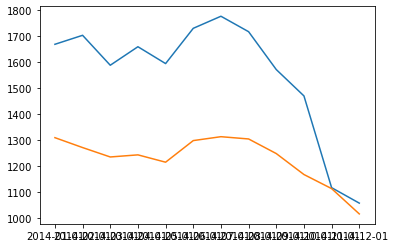

In [43]:
huber = HuberRegressor(alpha = .01, epsilon = 1.6)
huber.fit(x_tr, y_tr)
pred = huber.predict(x_ts)
cv_mape = mape(y_ts, pred)
plt.plot(pred)
plt.plot(y_ts)

In [44]:
cv_mape 


31.165320666578506

In [45]:
"""
в моем случае, mape значительно увеличилась (в 2 раза), что, конечно, не есть хорошо:)
Из позитивных моментов можно отметить, что несмотря на плохое предсказание на бОльшей части выборки, в конце модель предсказала достаточно точные значения
"""

'\nв моем случае, mape значительно увеличилась (в 2 раза), что, конечно, не есть хорошо:)\nИз позитивных моментов можно отметить, что несмотря на плохое предсказание на бОльшей части выборки, в конце модель предсказала достаточно точные значения\n'